# Fitting S model to control data

- Need to first run Cluster_Fit_Smodel_Ctrl.py, to obtain fits
- This notebook processed the fitted data and plots Supplementary Fig 4A-C

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("../../simulator/")
sys.path.append("../../fitting/")


from tissue import *
import tissplot as tplt
import matplotlib.path as mplPath
import analysis
import datasets as ds 
import tiss_optimize as topt
import sim_model

from matplotlib import rcParams

# Set global font properties
rcParams['font.family'] = 'sans-serif'

# Set global font size for all axes
rcParams['axes.labelsize'] = 10
rcParams['axes.labelweight'] = 'bold'
rcParams['xtick.labelsize'] = 7.5
rcParams['ytick.labelsize'] = 7.5
rcParams['legend.fontsize'] = 7.5
rcParams['font.size'] = 7.5  # General font size
rcParams['text.usetex'] = False
rcParams['svg.fonttype'] = 'none'
rcParams['lines.markersize']  = 3
rcParams['lines.linewidth']  = 1.5

In [ ]:
s0 = topt.optimizer(sim_model.S_mech_switch, {'r': [], 'tau': [],
                                              'Ahigh': []},
                    params = {'hilln': 2.0, 'L': 15, 'useTerm': True, 
                              'tadiv': 100}, simtype = 'h',
                exp_file = '../../experiment/ablation.pkl',  exp_prefix = 'ctr', tshift = -5.0,
                   metrics = [{'cost': 'cost_prd', 'dist_metric': 'ksd', 'dist': ['basalCS', 'totalCS']}])

s0.load_existing(10000, 225, 'ctr_S_mech_switch/')
s0.searchspace['cost_prd_ksd_bas_tot:shed'] = s0.searchspace['shed']
s0.searchspace['cost_prd_ksd_bas_tot:tscale'] = s0.searchspace['tscale']
print(s0.searchspace.to_markdown())

sim_data = s0.get_best_fit('cost_prd_ksd_bas_tot', 10000, 225, savefolder = 'ctr_S_mech_switch/', nseeds = 5, save_results = True)
exp_data = s0.exp_data

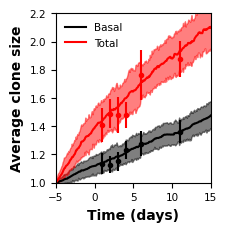

In [3]:
from importlib import reload
reload(ds)

plt.figure(figsize=(2.0,2.2))
ds.plot_quantity('basalCS', sim_data, exp_data, sim_data.tscalevals[0],
                 ylabel = 'Average clone size', plot_seeded = False, prelabel = 'bas: ', bootSEs = True, errmult = 1.96)
ds.plot_quantity('totalCS', sim_data, exp_data, sim_data.tscalevals[0],
                 ylabel = 'Average clone size', plot_seeded = False, color = 'r', prelabel = 'tot: ', bootSEs = True, errmult = 1.96)
plt.xlim([-5,15])
plt.ylim([1,2.2])
plt.legend(['Basal', 'Total'], frameon=False)
plt.savefig('SFig3A_aveCS.pdf', bbox_inches='tight')



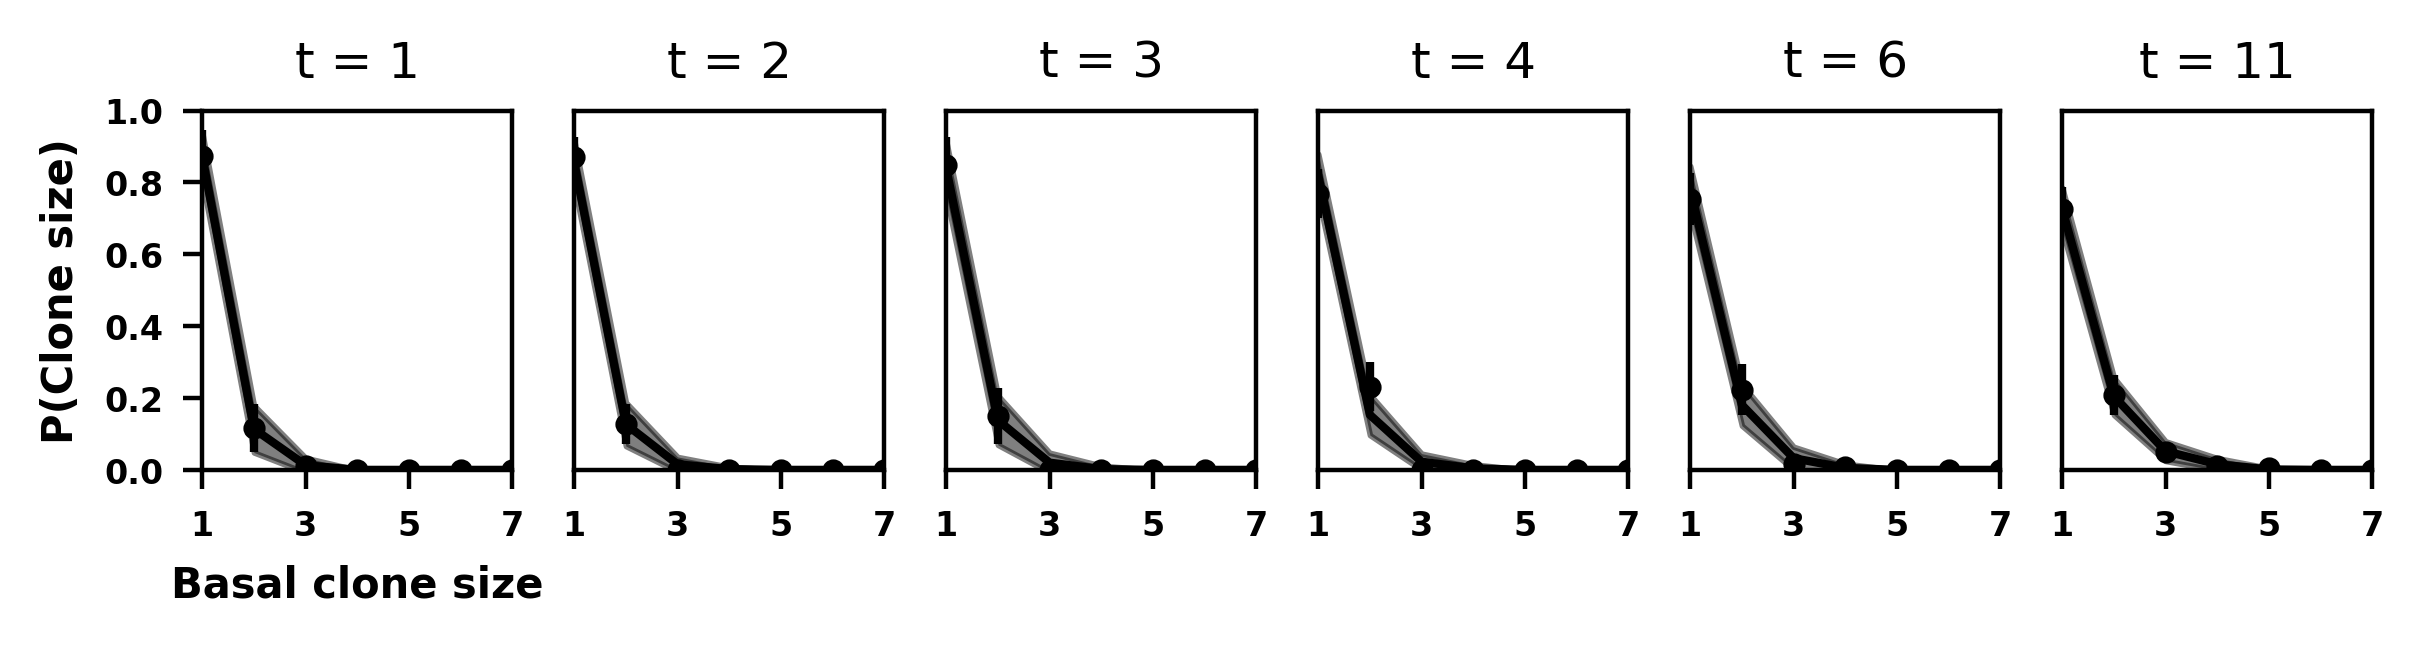

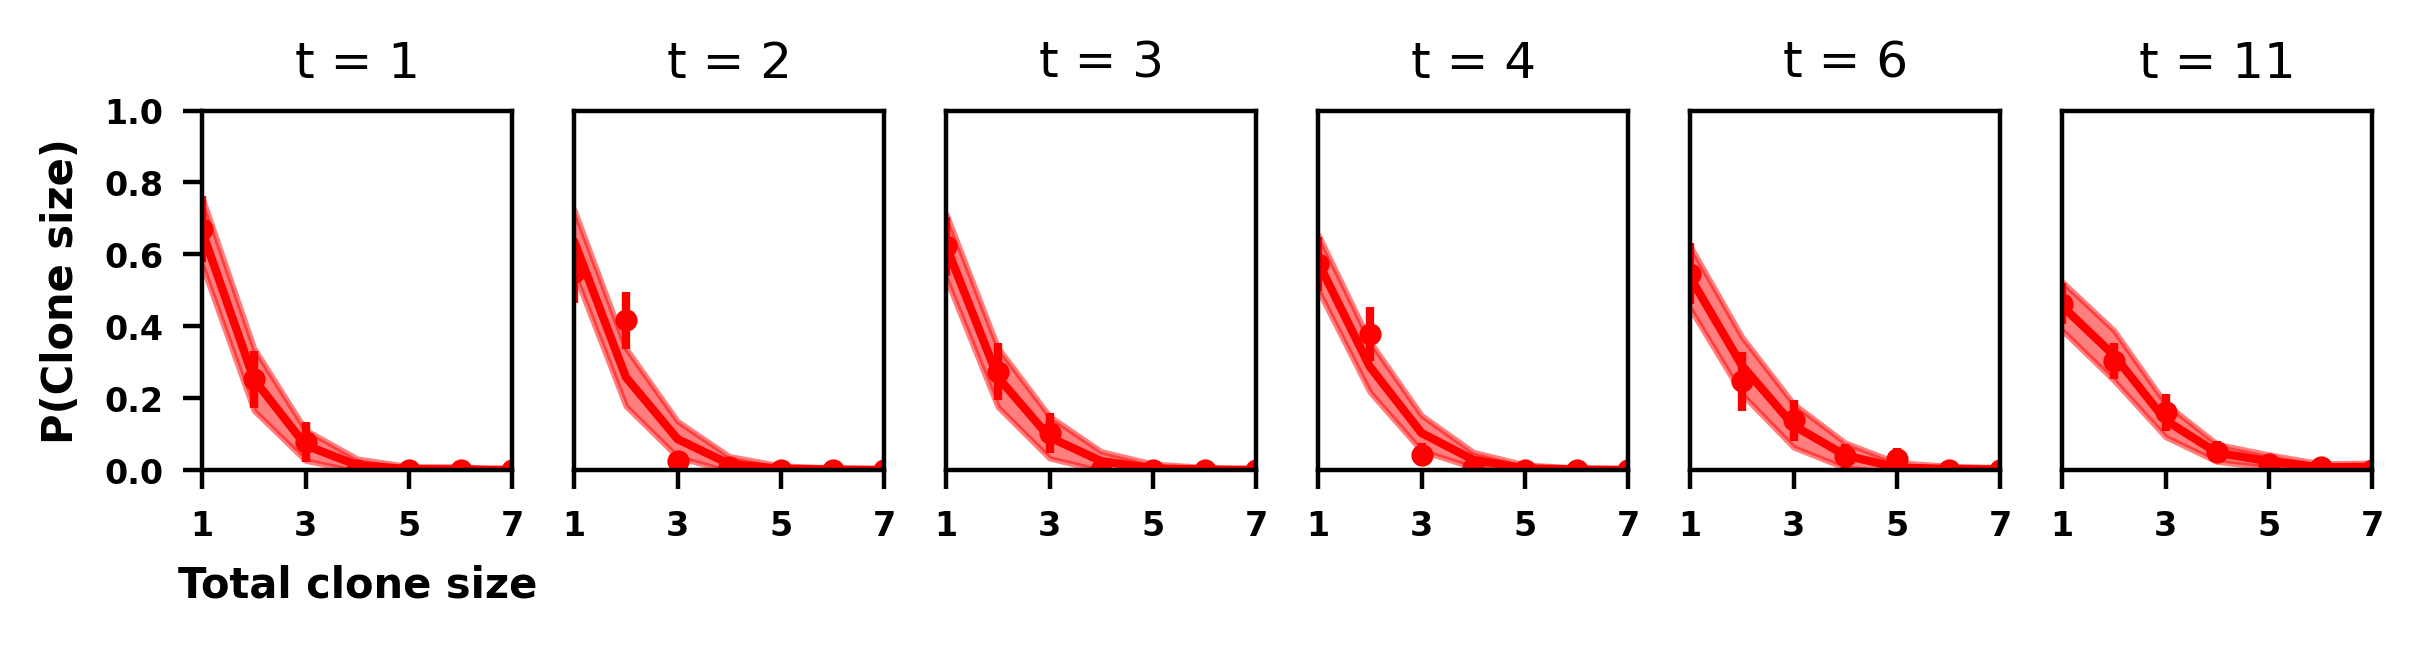

In [4]:
rcParams['axes.labelsize'] = 7.5
rcParams['xtick.labelsize'] = 6
rcParams['ytick.labelsize'] = 6
rcParams['legend.fontsize'] = 6
rcParams['font.size'] = 7.5  # General font size
rcParams['font.weight'] = 'bold'  # General font size

axs = ds.plot_dist('basalCS', sim_data, exp_data, subtimes= np.arange(0,6), maxbin = 7, cdf = False, 
                   xlabel= 'Basal clone size', ylabel = 'P(Clone size)',
                   prelabel= 'Basal', bootSEs = True, errmult = 1.96, im_width = 7, xticks = [1,3,5,7])
plt.savefig('SFig3B_basal_CS.pdf', bbox_inches='tight')

axs = ds.plot_dist('totalCS', sim_data, exp_data, subtimes= np.arange(0,6), maxbin = 7, cdf = False, 
                   xlabel= 'Total clone size', ylabel = 'P(Clone size)', color = 'r', subplot_axs=None,
                   prelabel= 'Total', bootSEs = True, errmult = 1.96, im_width = 7, xticks = [1,3,5,7])
plt.savefig('SFig3C_total_CS.pdf', bbox_inches='tight')